In [1]:
import torch

In [2]:
w = torch.tensor(-10.0, requires_grad=True)

In [3]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

In [4]:
import matplotlib.pyplot as plt

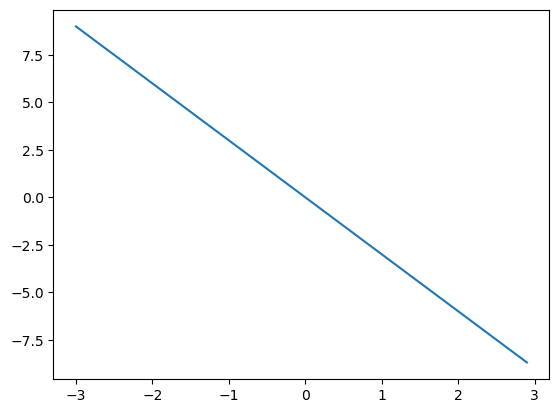

In [5]:
plt.plot(X.numpy(), f.numpy())
plt.show()

In [6]:
 Y = f + 0.1 * torch.randn(X.size())

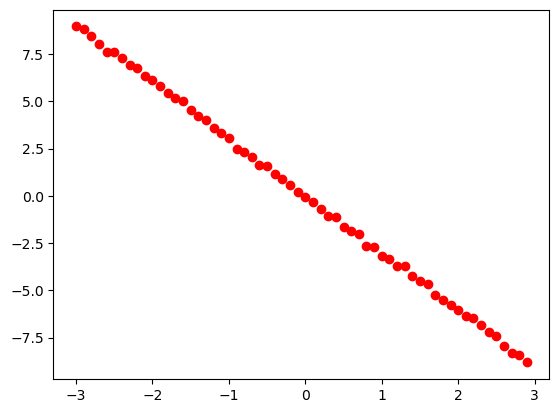

In [7]:
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [8]:
def forward(x):
    return w * x

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

In [9]:
lr = 0.1

COST = []

for epoch in range(4):
    Yhat = forward(X)
    loss = criterion(Yhat, Y)
    loss.backward()
    
    w.data = w.data - lr * w.grad.data
    
    w.grad.data.zero_()
    
    COST.append(loss.item())

In [10]:
import torch

In [11]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)


In [12]:
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

In [13]:
import matplotlib.pyplot as plt

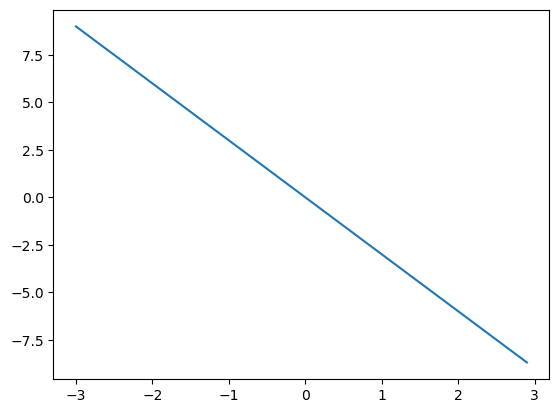

In [14]:
plt.plot(X.numpy(), f.numpy())
plt.show()

Adding some noise to the f

In [15]:
Y = f + 0.1 * torch.randn(X.size())

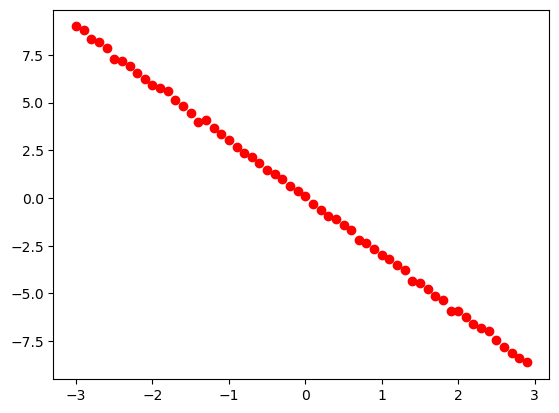

In [16]:
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [17]:
def forward(x):
    return w * x

def criterion(yhat, y):
    return torch.mean((yhat - y)**2)

# DataLoader 

In [18]:
from torch.utils.data import Dataset

In [19]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.y = -3 * X + 1
        self.len = self.x.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

In [20]:
dataset = Data()

# Optimization in PyTorch

In [21]:
import torch.nn as nn

In [22]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super(LR, self).__init__()
        
    def forward(self, x):
        out = self.linear(x)
        return out
    
    def criterion(yhat, y):
        return torch.mean((yhat-y)**2)
    

In [23]:
#self.linear = nn.Linear(input_size, output_size)


# Training and Validation Data

LIbraries to import 

In [24]:
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import optim

Random Data Creation

In [25]:
from torch.utils.data import Dataset, DataLoader

In [27]:
class Data(Dataset):
    
    # Constructor
    def __init__(self, train = True):
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        self.f = -3 * self.x + 1
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        self.len = self.x.shape[0]
        

# Softmax PyTorch

Import Modules

In [29]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

Load Data

In [30]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [32]:
train_dataset[0][1]

5

Create Model

In [33]:
class SoftMax(nn.Module):
    def __init__(self, in_size, out_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(in_size, out_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out    

In [35]:
input_dim = 28 * 28
output_dim = 10

model = SoftMax(input_dim, output_dim)

In [36]:
print('W:', list(model.parameters())[0].size())

W: torch.Size([10, 784])


In [37]:
print('b:', list(model.parameters())[1].size())

b: torch.Size([10])


In [ ]:
criterion = nn.CrossEntropyLoss()